In [1]:
import os
import time
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
combined_consolidated_df = pd.read_csv("df_final.csv")

In [4]:
# Detailed column stats sorted by non-null count (descending)
col_stats = pd.DataFrame({
    'non_null_count': combined_consolidated_df.notna().sum(),
    'null_count': combined_consolidated_df.isna().sum(),
    'unique_count': combined_consolidated_df.nunique(dropna=True)
}).sort_values('non_null_count', ascending=False)



In [5]:
combined_consolidated_df['surveyyear'].value_counts()

surveyyear
2018    19771
2023    17837
2019    17777
2021    16688
2022    14654
2024    13087
2020    12892
2016    11206
2017    10278
2025     9825
2015     5217
2013     1948
2014     1529
2012     1249
2011      563
Name: count, dtype: int64

In [6]:
# Add percent of total rows for nulls (rounded to 2 decimals)
total_rows = combined_consolidated_df.shape[0]
col_stats['null_pct'] = (col_stats['null_count'] / total_rows * 100).round(2)

In [7]:
col_stats.head(50)

,non_null_count,null_count,unique_count,null_pct
Unnamed: 0,154521,0,154521,0.00
surveyyear,154521,0,15,0.00
gender,154521,0,7,0.00
country,144479,10042,229,6.50
employment,140846,13675,151,8.85
education,137278,17243,12,11.16
years_coding,127417,27104,63,17.54
age,124955,29566,82,19.13
programming_experience,116643,37878,181,24.51
developer_type,113405,41116,14745,26.61


In [8]:
print(sorted(combined_consolidated_df['surveyyear'].dropna().unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


### Analyze by Country

#### Trend over time

In [9]:
# extract surveyyear and country and make a counts matrix
cols = ['surveyyear', 'country']
df_sub = combined_consolidated_df[cols].copy()

# drop rows missing either value
#df_sub = df_sub.dropna(subset=['surveyyear', 'country'])

# ensure surveyyear is treated consistently (optional)
# df_sub['surveyyear'] = df_sub['surveyyear'].astype(str)

# Create matrix: rows = surveyyear, cols = country, values = counts
matrix_df = pd.crosstab(df_sub['surveyyear'], df_sub['country']).sort_index()

# display and optionally save
display(matrix_df)


country,Afghanistan,Africa,Aland Islands,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,Australasia,Australia,Austria,Azerbaidjan,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Bouvet Island,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Central America,Chad,Chile,China,Colombia,"Congo, Republic of the...",Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Heard and McDonald Islands,Honduras,Hong Kong,Hungary,I prefer not to say,Iceland,India,Indonesia,Iran,"Iran, Islamic Republic of...",Iraq,Ireland,Isle of Man,Israel,Italy,Ivory Coast,Ivory Coast (Cote D'Ivoire),Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macedonia,Macedonia [FYROM],Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia,"Micronesia, Federated States of...",Middle East,Moldavia,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Myanmar [Burma],Namibia,Nepal,Netherlands,Netherlands Antilles,New Caledonia (French),New Zealand,Nicaragua,Niger,Nigeria,Nomadic,North America (Other),North Korea,Norway,Oman,Other,Other Asia,Other Europe,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn Island,Poland,Polynesia (French),Portugal,Puerto Rico,Qatar,Republic of Moldova,Republic of North Macedonia,Reunion (French),Romania,Russia,Russian Federation,Rwanda,Saint Helena,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovakia,Slovenia,Somalia,South Africa,South America,South Korea,Spain,Sri Lanka,St Kitts & Nevis,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Vatican,Vatican City,Venezuela,"Venezuela, Bolivarian Republic of...",Vietnam,Yemen,Zaire,Zambia,Zimbabwe
surveyyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,0,5,0,0,0,0,0,0,0,0,0,0,0,0,3,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,18,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,2,0,0,0,0,18,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,0,195,0,0,0,0,0,0,0,0,0,0,0
2012,0,15,0,0,0,0,0,0,0,0,0,0,0,0,23,27,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,57,0,0,0,0,0,0,0,0,0,0,0,0,114,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,21,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,2,0,0,0,0,38,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,0,349,0,0,0,0,0,0,0,0,0,0,0
2013,0,25,0,0,0,0,0,0,0,0,0,0,0,0,25,43,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,101,0,0,0,0,0,0,0,0,0,0,0,0,159,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

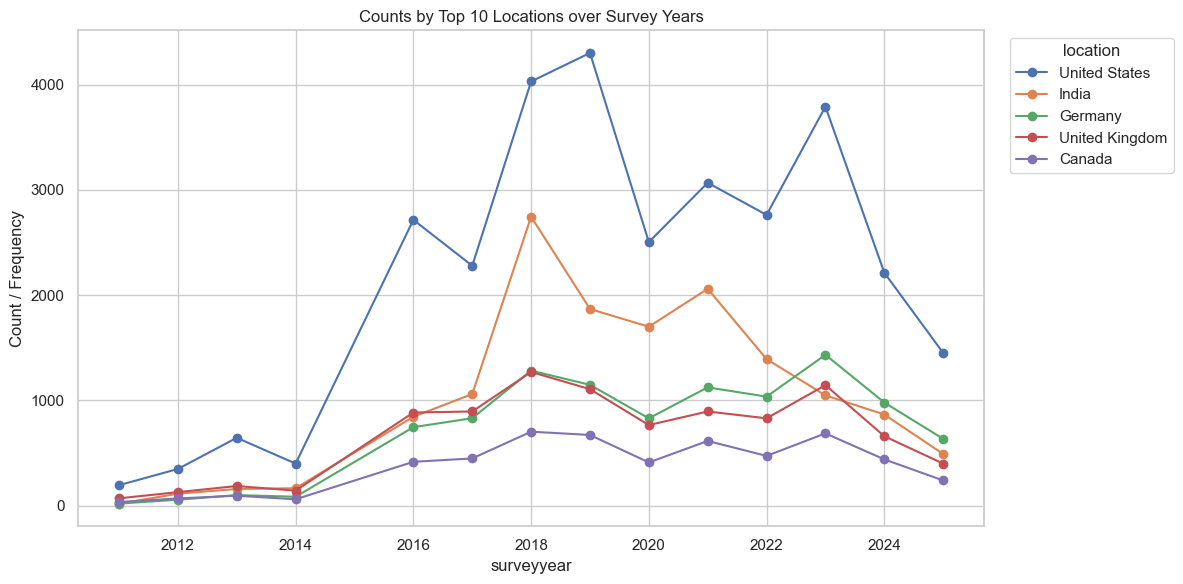

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare a plotting-friendly copy (try numeric years first, otherwise keep strings)
matrix_plot = matrix_df.copy()
years_numeric = pd.to_numeric(matrix_plot.index, errors='coerce')
if years_numeric.notna().all():
    matrix_plot.index = years_numeric
matrix_plot = matrix_plot.sort_index()

# Select top 10 countries by total count
top_countries = matrix_plot.sum(axis=0).sort_values(ascending=False).head(5).index
matrix_plot_top = matrix_plot[top_countries]

sns.set(style='whitegrid')
ax = matrix_plot_top.plot(kind='line', figsize=(12,6), marker='o', linewidth=1.5)
ax.set_xlabel('surveyyear')
ax.set_ylabel('Count / Frequency')
ax.set_title('Counts by Top 10 Locations over Survey Years')
ax.legend(title='location', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save and show
plt.show()


#### Overall by country

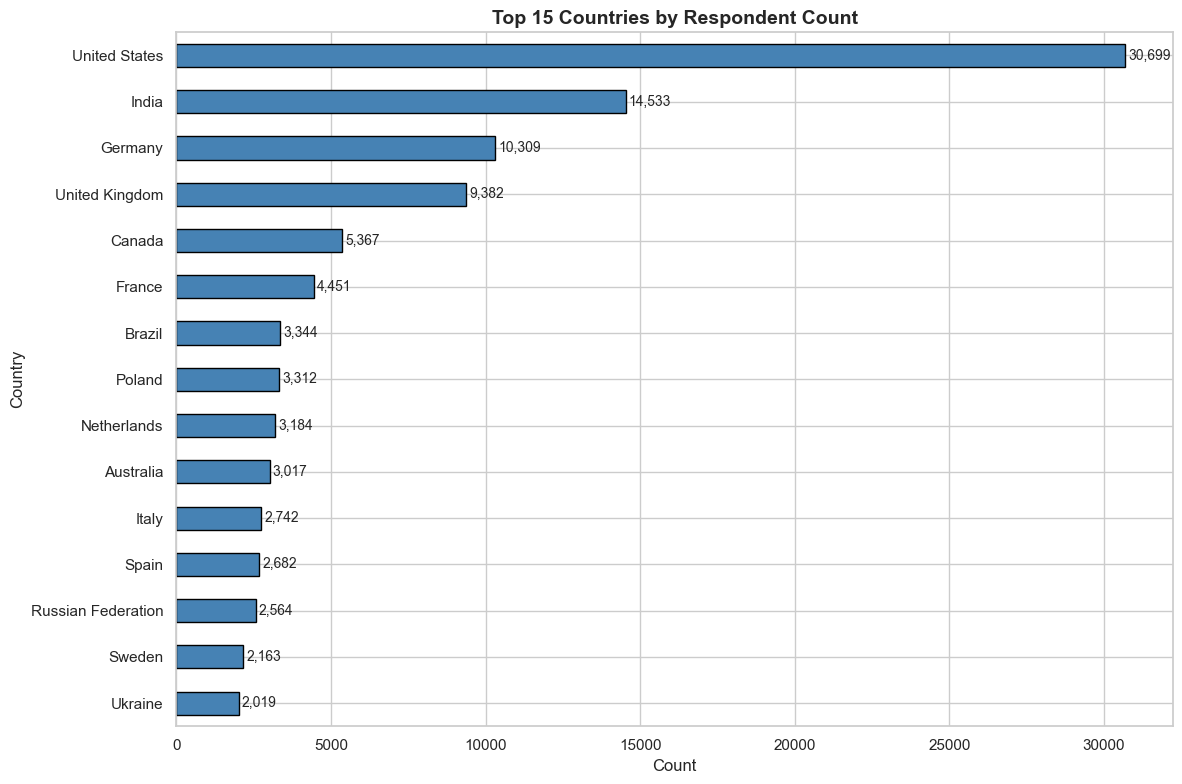

In [11]:
# Get country counts and select top 15
country_counts = combined_consolidated_df['country'].value_counts().head(15)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

ax = country_counts.plot(kind='barh', color='steelblue', edgecolor='black')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Top 15 Countries by Respondent Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top

# Add value labels on bars
for i, v in enumerate(country_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Education Analysis

#### Trend for Education

In [12]:
# Create education by survey year matrix
cols = ['surveyyear', 'education']
df_edu = combined_consolidated_df[cols].copy()

# Create matrix: rows = surveyyear, cols = education, values = counts
education_matrix = pd.crosstab(df_edu['surveyyear'], df_edu['education']).sort_index()

display(education_matrix)

education,Professional degree,associate degree,bachelors,doctoral degree,i prefer not to say,less than college,masters,none,on the job training,other program,self-taught,some college
surveyyear,,,,,,,,,,,,
2016,0,0,3768,45,0,0,1056,0,192,70,3672,169
2017,137,0,5971,290,243,1342,2217,78,0,0,0,0
2018,0,601,8702,777,0,2048,4317,153,0,0,0,2335
2019,0,563,7837,728,0,1996,3976,105,0,0,0,2089
2020,0,366,5351,500,0,1112,2629,96,0,0,0,1426
2021,0,469,7053,774,0,2339,3568,0,0,319,0,2118
2022,0,408,6143,636,0,1916,3075,0,0,264,0,1843
2023,0,599,7318,788,0,2156,4105,0,0,308,0,2330
2024,0,368,5031,600,0,1417,3048,0,0,178,0,1522


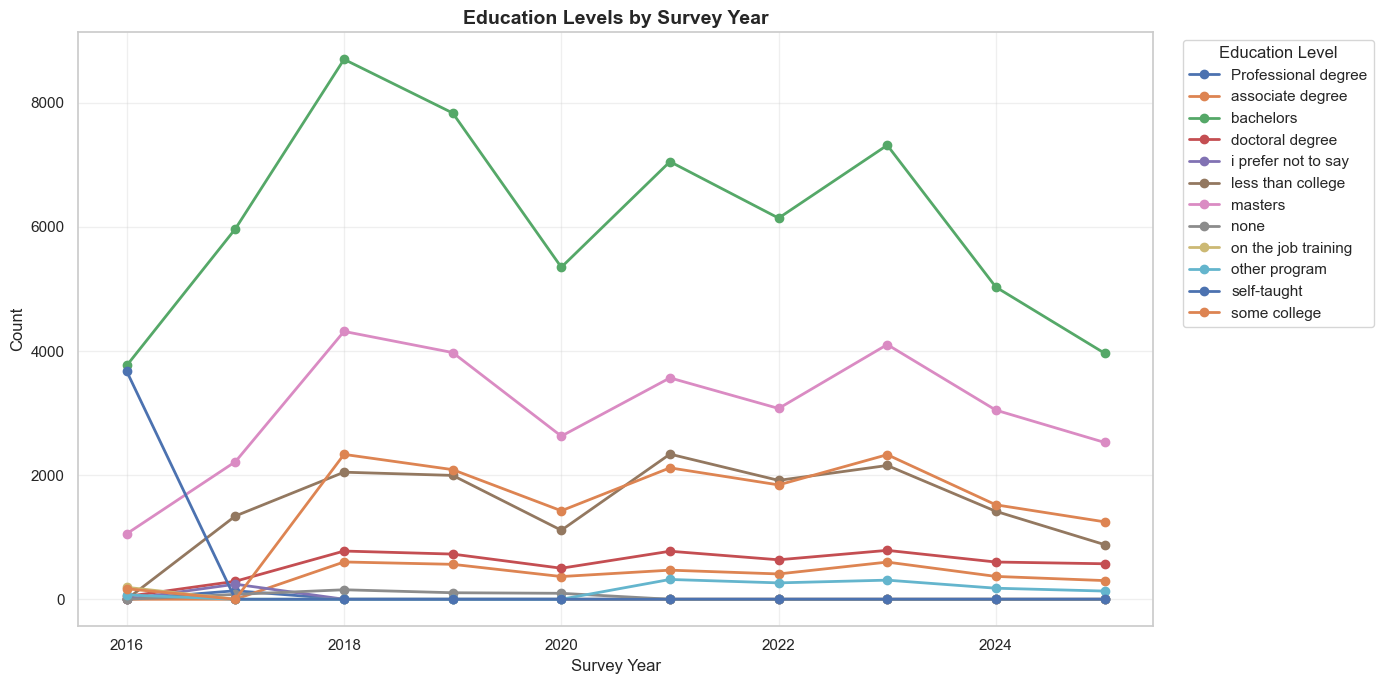

In [13]:
# Create line chart for education levels over time
education_plot = education_matrix.copy()

# Convert years to numeric if possible
years_numeric = pd.to_numeric(education_plot.index, errors='coerce')
#if years_numeric.notna().all():
#    education_plot.index = years_numeric
education_plot = education_plot.sort_index()

# Create the line chart
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each education level
for col in education_plot.columns:
    ax.plot(education_plot.index, education_plot[col], marker='o', linewidth=2, label=col)

ax.set_xlabel('Survey Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Education Levels by Survey Year', fontsize=14, fontweight='bold')
ax.legend(title='Education Level', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Overall education

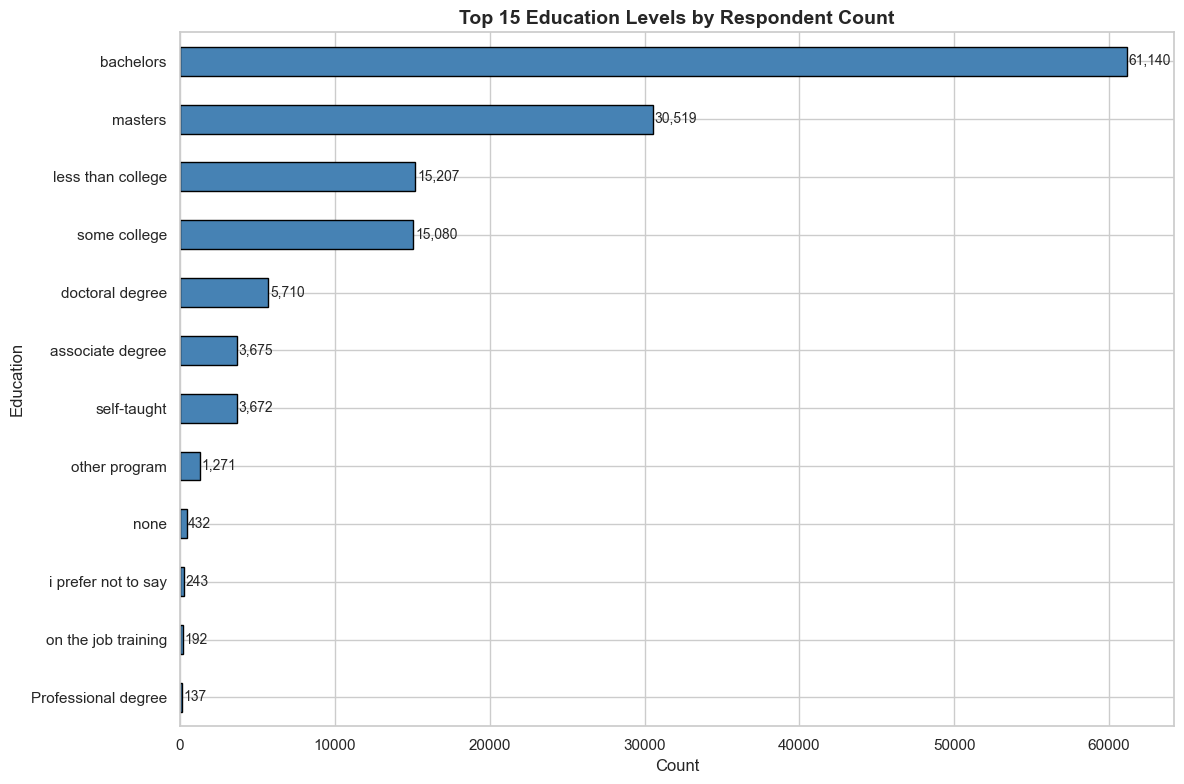

In [14]:
# Get country counts and select top 15
education_counts = combined_consolidated_df['education'].value_counts().head(15)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

ax = education_counts.plot(kind='barh', color='steelblue', edgecolor='black')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Education', fontsize=12)
ax.set_title('Top 15 Education Levels by Respondent Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top

# Add value labels on bars
for i, v in enumerate(education_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Developer Type Analysis

#### Trend Analysis

In [15]:
# extract surveyyear and country and make a counts matrix
cols = ['surveyyear', 'developer_type_clean']
df_dev = combined_consolidated_df[cols].copy()

# Create matrix: rows = surveyyear, cols = country, values = counts
matrix_df_dev = pd.crosstab(df_dev['surveyyear'], df_dev['developer_type_clean']).sort_index()
# display and optionally save
display(matrix_df_dev)

developer_type_clean,back-end developer,cyber security,data role,data scientist,design,educator,engineering role,executive,front-end developer,full-stack developer,marketing or sales professional,other developer,other role,product/project manager,research role,retired,student,systems administrator
surveyyear,,,,,,,,,,,,,,,,,,
2017,0,0,26,165,2,0,23,0,0,0,0,6781,226,0,0,0,0,21
2018,10707,0,788,441,525,0,173,226,1070,1456,13,2090,0,48,183,0,636,55
2019,5120,0,2414,641,1021,39,135,48,961,2419,20,1811,0,29,1221,0,337,49
2020,3585,0,1526,409,624,13,70,23,627,1239,10,1020,0,21,743,0,0,32
2021,1648,0,534,394,29,24,143,63,2634,3333,18,3453,475,40,220,0,190,65
2022,2132,26,470,674,20,64,432,59,3040,3352,15,1118,261,58,147,0,336,40
2023,2816,158,446,330,58,81,741,276,1040,5078,30,2306,643,231,605,0,363,162
2024,1922,102,385,206,29,69,455,205,662,3720,15,1833,521,129,509,0,1034,109
2025,1279,72,255,102,0,0,529,111,384,2505,0,1874,447,90,336,89,592,102


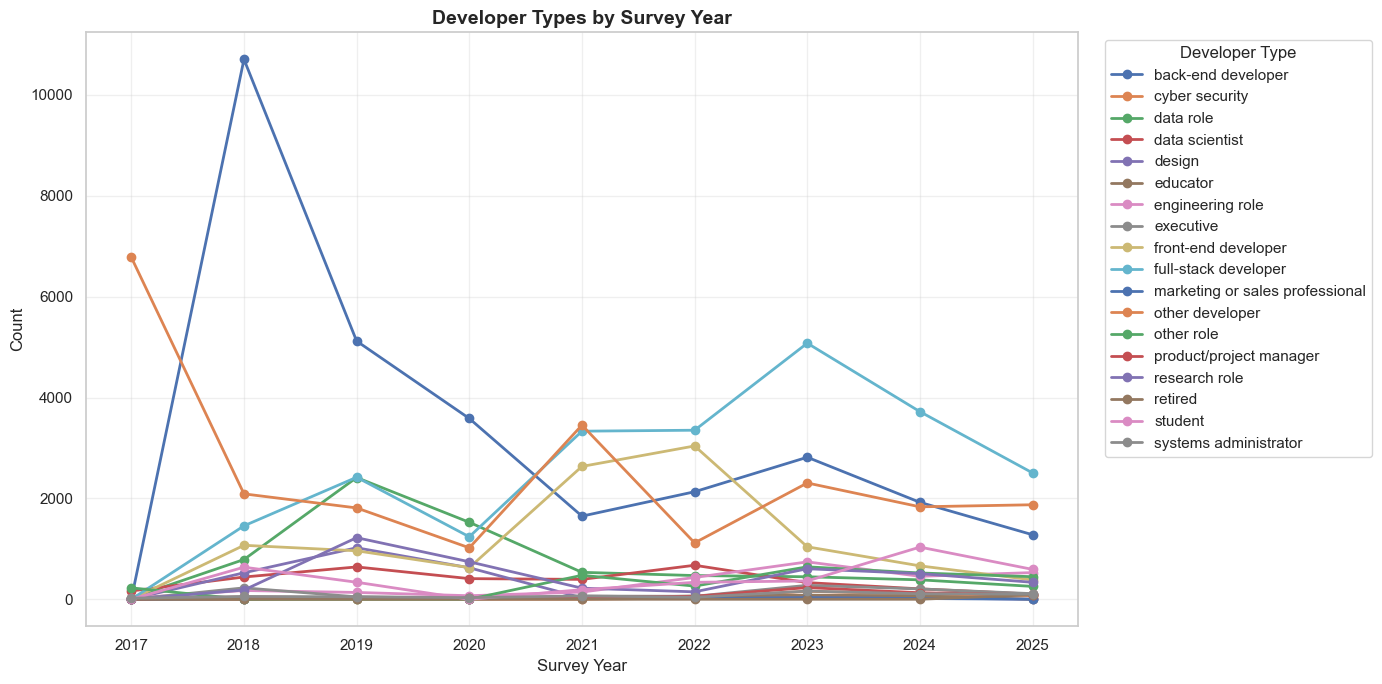

In [16]:
# Create line chart for education levels over time
dev_plot = matrix_df_dev.copy()

# Convert years to numeric if possible
years_numeric = pd.to_numeric(dev_plot.index, errors='coerce')
if years_numeric.notna().all():
    dev_plot.index = years_numeric
dev_plot = dev_plot.sort_index()

# Create the line chart
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each education level
for col in dev_plot.columns:
    ax.plot(dev_plot.index, dev_plot[col], marker='o', linewidth=2, label=col)

ax.set_xlabel('Survey Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Developer Types by Survey Year', fontsize=14, fontweight='bold')
ax.legend(title='Developer Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Overall Analysis

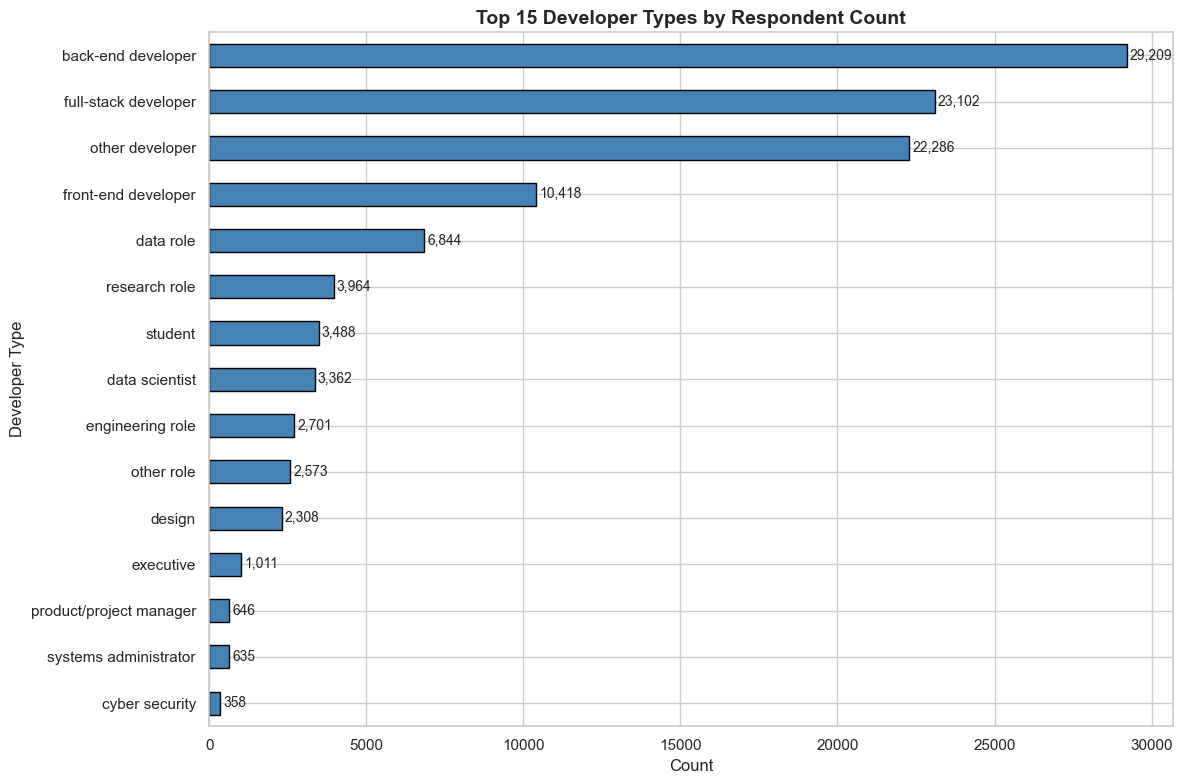

In [17]:
# Get country counts and select top 15
developer_counts = combined_consolidated_df['developer_type_clean'].value_counts().head(15)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

ax = developer_counts.plot(kind='barh', color='steelblue', edgecolor='black')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Developer Type', fontsize=12)
ax.set_title('Top 15 Developer Types by Respondent Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top

# Add value labels on bars
for i, v in enumerate(developer_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Regional Differences

#### Developer Type by Country

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Create developer type by country matrix for top countries
cols = ['country', 'developer_type_clean']
df_country_dev = combined_consolidated_df[cols].dropna()

top_countries = df_country_dev['country'].value_counts().head(15).index

# Use same top 10 countries for consistency
df_country_dev_top = df_country_dev[df_country_dev['country'].isin(top_countries)]

# Create crosstab
country_dev_matrix = pd.crosstab(df_country_dev_top['country'], df_country_dev_top['developer_type_clean'])

# Sort by total count (descending)
country_dev_matrix = country_dev_matrix.loc[country_dev_matrix.sum(axis=1).sort_values(ascending=False).index]

display(country_dev_matrix)

developer_type_clean,back-end developer,cyber security,data role,data scientist,design,educator,engineering role,executive,front-end developer,full-stack developer,marketing or sales professional,other developer,other role,product/project manager,research role,retired,student,systems administrator
country,,,,,,,,,,,,,,,,,,
United States,5571,78,1668,767,537,89,779,263,1852,5135,36,4432,686,128,800,25,590,160
India,3025,18,566,345,336,14,135,59,1250,1891,5,2216,123,36,248,0,487,24
Germany,1986,35,418,249,122,19,189,56,619,1585,8,1750,192,73,431,6,288,60
United Kingdom,1852,21,452,218,129,14,187,74,564,1550,6,1458,181,21,180,5,131,35
Canada,978,14,235,104,78,15,114,50,315,888,6,844,122,28,119,5,132,24
France,823,16,160,128,45,14,97,38,256,781,3,786,63,31,148,0,87,15
Brazil,847,5,173,83,44,17,46,16,256,639,3,443,49,17,147,2,60,10
Poland,838,5,140,61,62,1,49,14,221,410,1,573,41,8,48,0,68,18
Netherlands,736,6,154,79,64,10,46,19,231,491,1,405,54,11,93,3,55,8


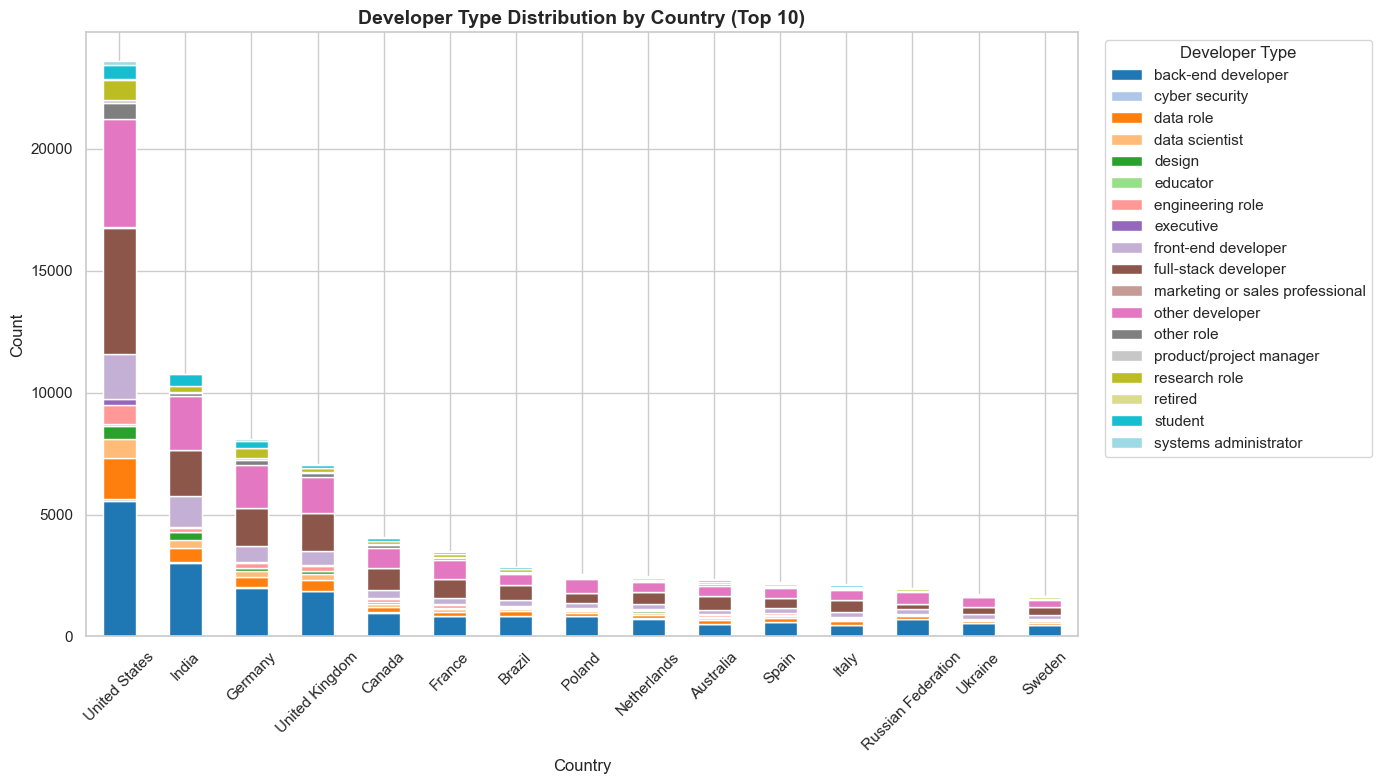

In [29]:
# Create stacked bar chart for developer type by country
fig, ax = plt.subplots(figsize=(14, 8))

country_dev_matrix.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Developer Type Distribution by Country (Top 10)', fontsize=14, fontweight='bold')
ax.legend(title='Developer Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

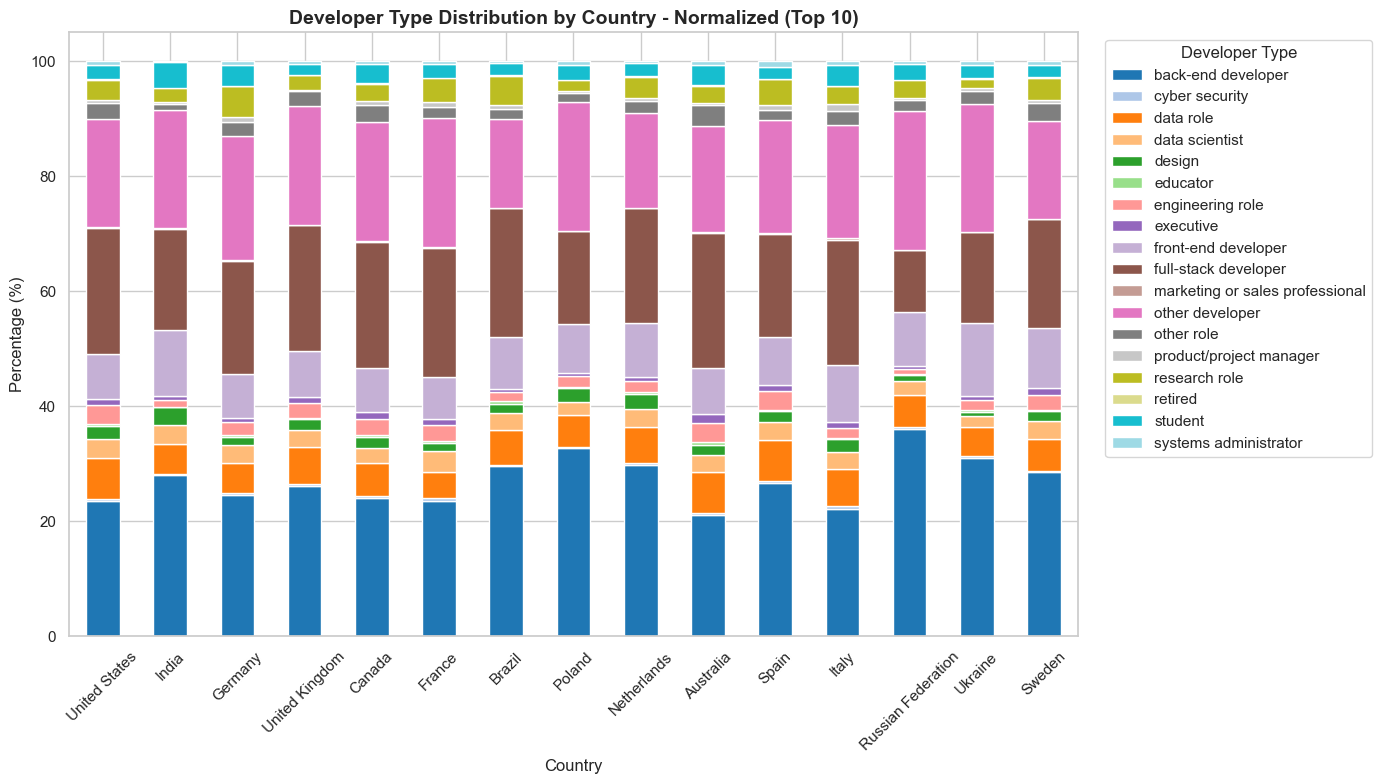

In [30]:
# Create normalized (percentage) view for developer type
country_dev_pct = country_dev_matrix.div(country_dev_matrix.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))

country_dev_pct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Developer Type Distribution by Country - Normalized (Top 10)', fontsize=14, fontweight='bold')
ax.legend(title='Developer Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

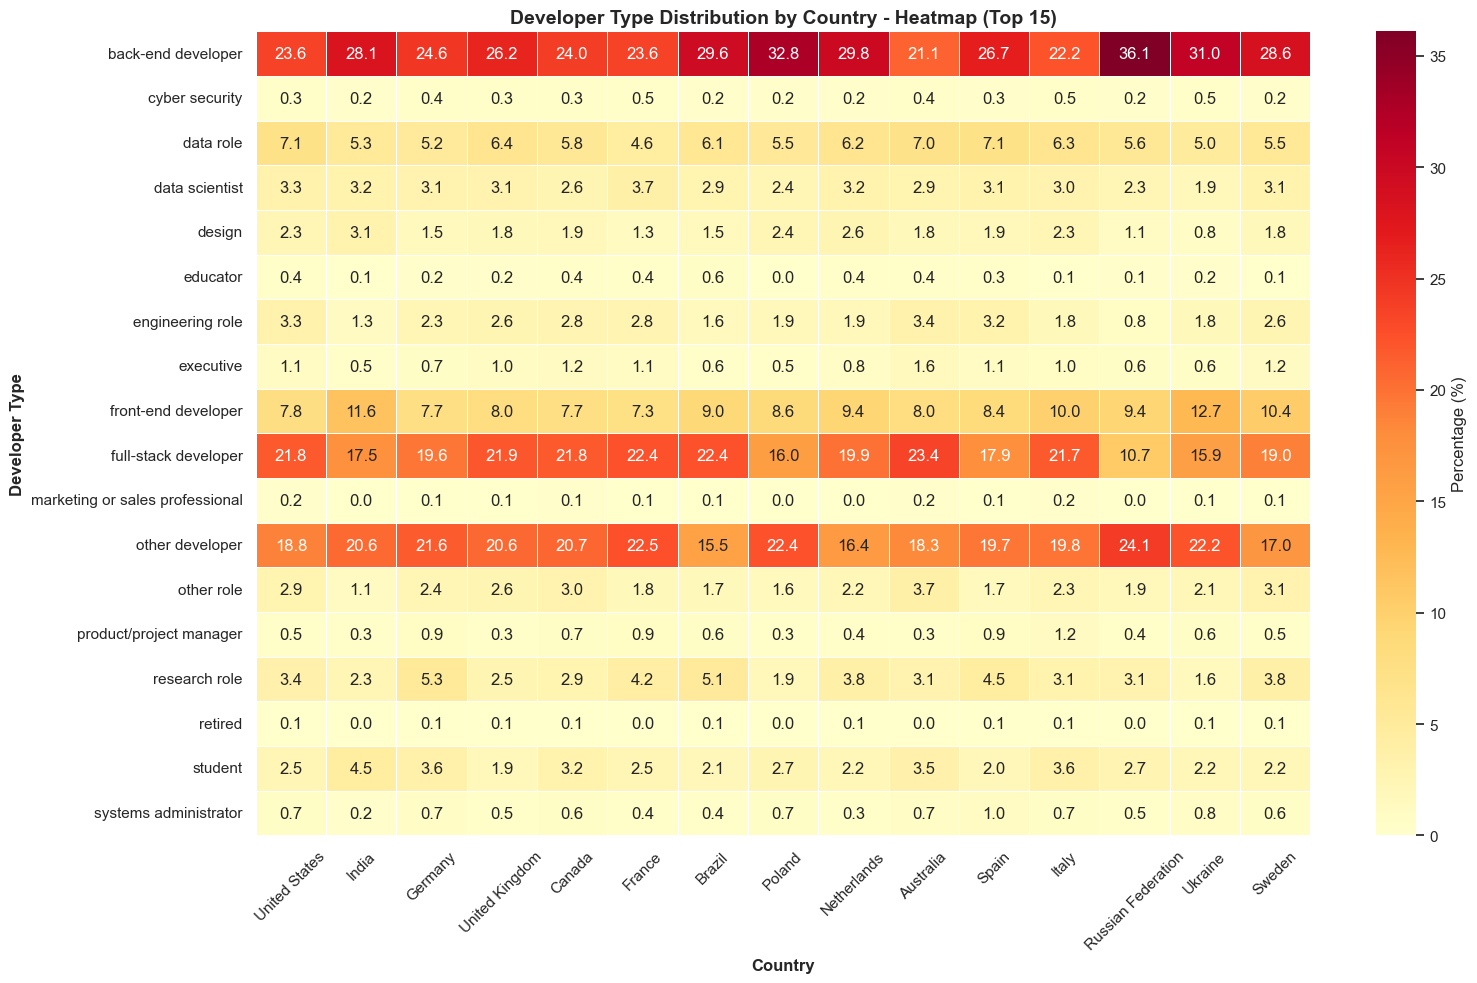

In [32]:
# Create heatmap for developer type by country
fig, ax = plt.subplots(figsize=(16, 10))

# Use normalized percentages for better comparison across countries
sns.heatmap(country_dev_pct.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=0.5)

ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Developer Type', fontsize=12, fontweight='bold')
ax.set_title('Developer Type Distribution by Country - Heatmap (Top 15)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

#### Education by Country

In [25]:
# Create education by country matrix for top countries
cols = ['country', 'education']
df_country_edu = combined_consolidated_df[cols].dropna()

# Get top 15 countries by respondent count
top_countries = df_country_edu['country'].value_counts().head(15).index

# Filter to top countries
df_country_edu_top = df_country_edu[df_country_edu['country'].isin(top_countries)]

# Create crosstab
country_edu_matrix = pd.crosstab(df_country_edu_top['country'], df_country_edu_top['education'])

# Sort by total count (descending)
country_edu_matrix = country_edu_matrix.loc[country_edu_matrix.sum(axis=1).sort_values(ascending=False).index]

display(country_edu_matrix)

education,Professional degree,associate degree,bachelors,doctoral degree,i prefer not to say,less than college,masters,none,on the job training,other program,self-taught,some college
country,,,,,,,,,,,,
United States,8,1056,14761,1151,39,2144,4798,65,28,148,976,3263
India,9,58,8274,113,25,1238,2603,35,55,93,270,511
Germany,3,242,2823,553,24,1791,2912,13,12,135,268,969
United Kingdom,3,117,3953,481,16,811,1781,20,14,70,320,1015
Canada,4,304,2387,159,11,499,694,16,7,94,139,638
France,21,75,791,350,12,159,2424,10,1,48,73,213
Brazil,5,142,1535,144,1,360,418,8,3,23,55,536
Poland,4,28,919,63,7,430,1153,12,2,33,116,363
Netherlands,4,120,1239,97,4,330,730,4,1,41,100,313


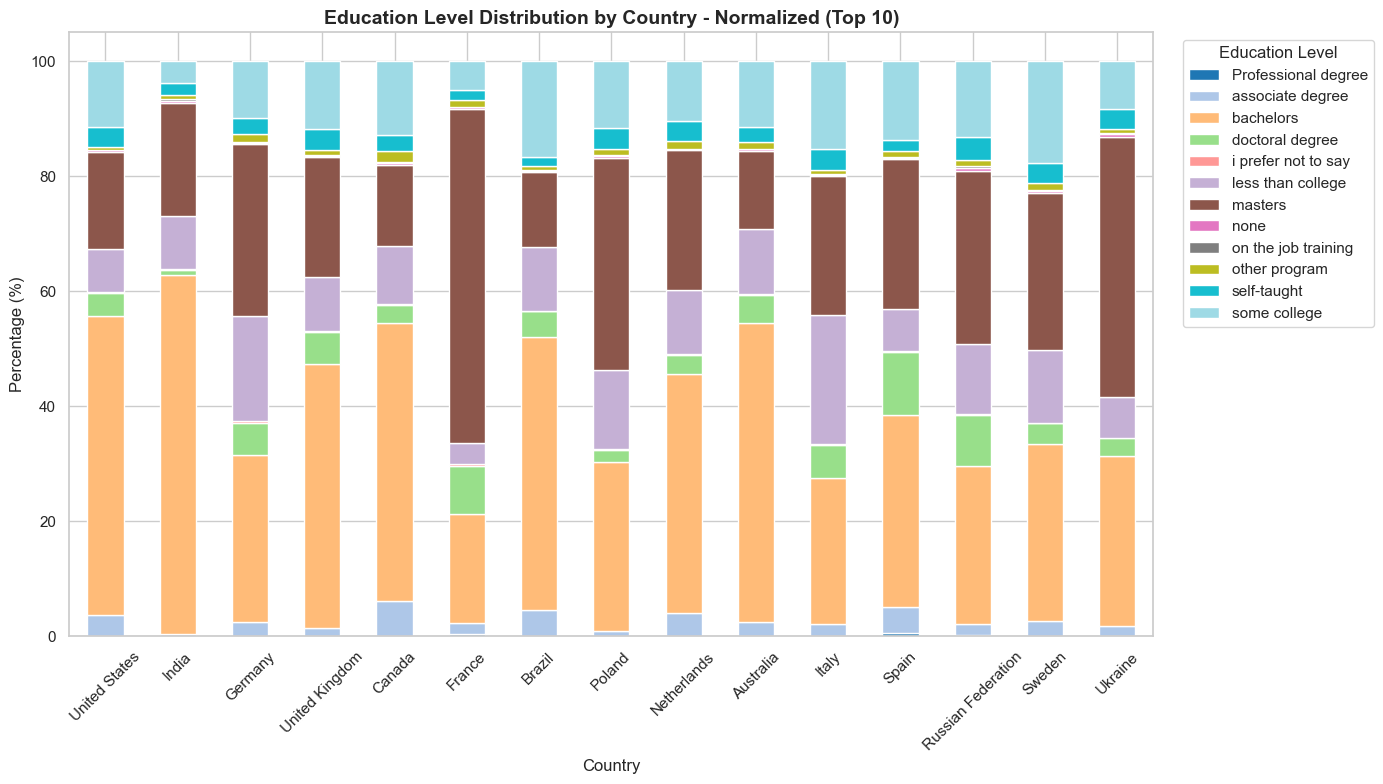

In [26]:
# Create normalized (percentage) view for better comparison
country_edu_pct = country_edu_matrix.div(country_edu_matrix.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))

country_edu_pct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Education Level Distribution by Country - Normalized (Top 10)', fontsize=14, fontweight='bold')
ax.legend(title='Education Level', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

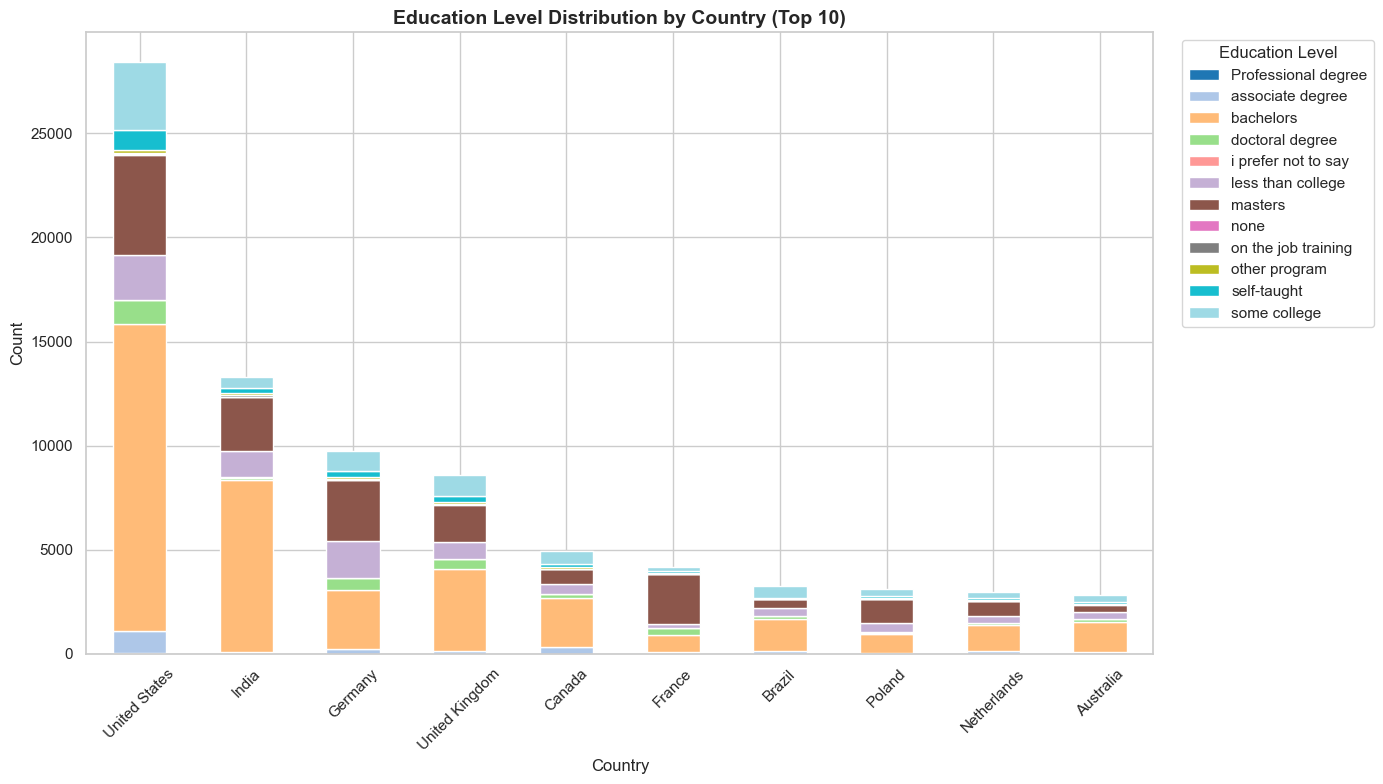

In [ ]:
# Create stacked bar chart for education by country
fig, ax = plt.subplots(figsize=(14, 8))

country_edu_matrix.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Education Level Distribution by Country (Top 10)', fontsize=14, fontweight='bold')
ax.legend(title='Education Level', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

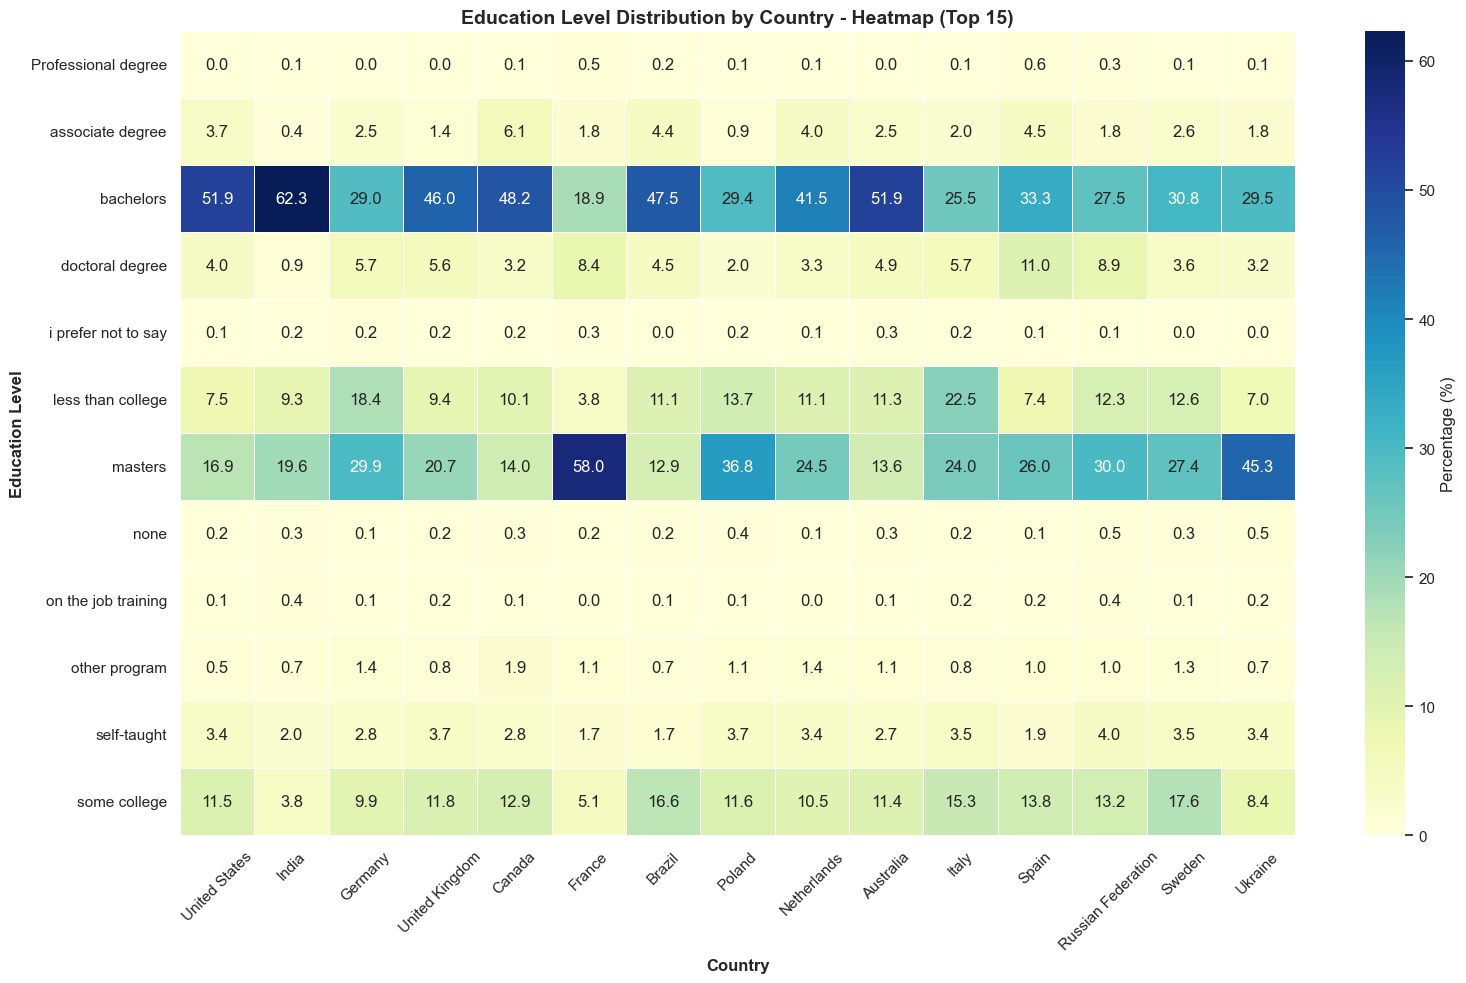

In [33]:
# Create heatmap for education by country
fig, ax = plt.subplots(figsize=(16, 10))

# Use normalized percentages for better comparison across countries
sns.heatmap(country_edu_pct.T, annot=True, fmt='.1f', cmap='YlGnBu', 
            cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=0.5)

ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Education Level', fontsize=12, fontweight='bold')
ax.set_title('Education Level Distribution by Country - Heatmap (Top 15)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()